In [1]:
from pyspark import SparkContext, SparkConf
import json
import os
import sys
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, udf

In [2]:
# Load review data
cellphone_rdd = sc.textFile("token_data/cellphone_cleaned.json")
cellphone_data = cellphone_rdd.map(lambda line: json.loads(line))

In [4]:
from pyspark.sql import SparkSession

# create a Spark session
spark = SparkSession \
        .builder \
        .appName("Lab2-SparkSQL") \
        .config("spark.jars", "/usr/local/spark-3.3.0-bin-hadoop3/jars/mysql-connector-java-5.0.7-bin.jar") \
        .config("spark.jars.packages", "com.databricks:spark-xml_2.12:0.13.0") \
        .getOrCreate()
spark.conf.set("spark.sql.caseSensitive", True)

In [46]:
cellphone_data = spark.read.json('./token_data/cellphone_cleaned.json')
accessory_data = spark.read.json('./token_data/accessories_cleaned.json')

In [131]:
cellphone_data_5 = cellphone_data.filter(col('overall')==5)
cellphone_data_12 = cellphone_data.filter((col('overall')==1) | (col('overall')==2))

accessory_data_5 = accessory_data.filter(col('overall')==5)
accessory_data_12 = accessory_data.filter((col('overall')==1) | (col('overall')==2))

In [122]:
cellphone_data.count()

7584

In [121]:
cellphone_data_5.count()

4483

In [132]:
cellphone_data_12.count()

1399

In [124]:
accessory_data.count()

167162

In [125]:
accessory_data_5.count()

108924

In [133]:
accessory_data_12.count()

21045

In [135]:
cellphone_text = cellphone_data.select('cleaned_review')
accessory_text = accessory_data.select('cleaned_review')
cellphone_text_5 = cellphone_data_5.select('cleaned_review')
accessory_text_5 = accessory_data_5.select('cleaned_review')
cellphone_text_12 = cellphone_data_12.select('cleaned_review')
accessory_text_12 = accessory_data_12.select('cleaned_review')

In [138]:
cleaned_cell_reviews = cellphone_text.collect()
cleaned_acc_reviews = accessory_text.collect()
cleaned_cell_reviews_5 = cellphone_text_5.collect()
cleaned_acc_reviews_5 = accessory_text_5.collect()
cleaned_cell_reviews_12 = cellphone_text_12.collect()
cleaned_acc_reviews_12 = accessory_text_12.collect()

In [152]:
all_cell_reviews = ''
cell_reviews_5 = ''
cell_reviews_12 = ''

for r in cleaned_cell_reviews:
    all_cell_reviews += ' '.join(r[0])
cell_wc = WordCloud(scale=10,background_color="white",stopwords=my_stopwords.union(set(['phone'])),
                    random_state=1,min_word_length=4)
for r in cleaned_cell_reviews_5:
    cell_reviews_5 += ' '.join(r[0])
cell_wc_5 = WordCloud(scale=10,background_color="white",stopwords=my_stopwords.union(set(['phone'])),
                    random_state=1,min_word_length=4)
for r in cleaned_cell_reviews_12:
    cell_reviews_12 += ' '.join(r[0])
cell_wc_12 = WordCloud(scale=10,background_color="white",stopwords=my_stopwords.union(set(['phone'])),
                    random_state=1,min_word_length=4)

In [153]:
cell_wc = cell_wc.generate(all_cell_reviews)
cell_wc_5 = cell_wc_5.generate(cell_reviews_5)
cell_wc_12 = cell_wc_12.generate(cell_reviews_12)

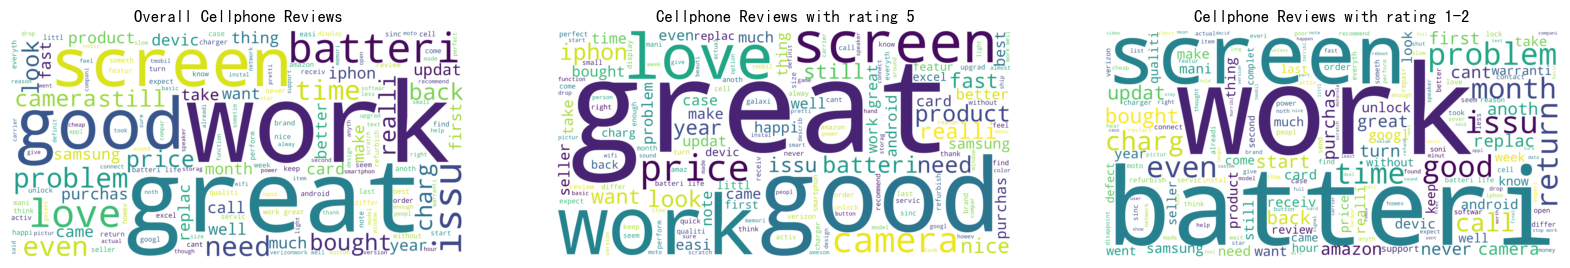

In [182]:
plt.figure(figsize=(20,20))
# word cloud for all cellphone reviews
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Overall Cellphone Reviews')
plt.imshow(cell_wc, interpolation='bilinear')

# word cloud for cellphone reviews with score 5
plt.subplot(1, 3, 2)
plt.title('Cellphone Reviews with rating 5')
plt.axis("off")
plt.imshow(cell_wc_5, interpolation='bilinear')

# word cloud for cellphone reviews with score 1 or 2
plt.subplot(1, 3, 3)
plt.title('Cellphone Reviews with rating 1-2')
plt.axis("off")
plt.imshow(cell_wc_12, interpolation='bilinear')
plt.savefig('cell_reviews.png')

In [173]:
all_acc_reviews = ''
acc_reviews_5 = ''
acc_reviews_12 = ''

for r in cleaned_acc_reviews:
    all_acc_reviews += ' '.join(r[0])
acc_wc = WordCloud(scale=10,background_color="white",stopwords=my_stopwords.union(set(['case','phone'])),
                    random_state=1,min_word_length=4)
for r in cleaned_acc_reviews_5:
    acc_reviews_5 += ' '.join(r[0])
acc_wc_5 = WordCloud(scale=10,background_color="white",stopwords=my_stopwords.union(set(['case','phone'])),
                    random_state=1,min_word_length=4)
for r in cleaned_acc_reviews_12:
    acc_reviews_12 += ' '.join(r[0])
acc_wc_12 = WordCloud(scale=10,background_color="white",stopwords=my_stopwords.union(set(['case','phone'])),
                    random_state=1,min_word_length=4)

In [175]:
acc_wc = acc_wc.generate(all_acc_reviews)
acc_wc_5 = acc_wc_5.generate(acc_reviews_5)
acc_wc_12 = acc_wc_12.generate(acc_reviews_12)

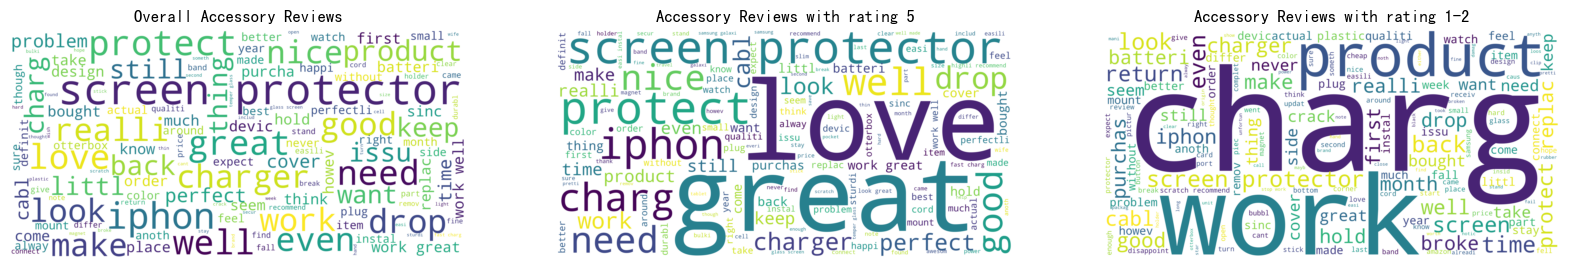

In [183]:
plt.figure(figsize=(20,20))
# word cloud for all accessory reviews
plt.subplot(1, 3, 1)
plt.title('Overall Accessory Reviews')
plt.axis("off")
plt.imshow(acc_wc, interpolation='bilinear')

# word cloud for cellphone reviews with score 5
plt.subplot(1, 3, 2)
plt.title('Accessory Reviews with rating 5')
plt.axis("off")
plt.imshow(acc_wc_5, interpolation='bilinear')

# word cloud for cellphone reviews with score 1 or 2
plt.subplot(1, 3, 3)
plt.title('Accessory Reviews with rating 1-2')
plt.axis("off")
plt.imshow(acc_wc_12, interpolation='bilinear')
plt.savefig('acc_reviews.png')